In [2]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of the reverse complement of P in T. If P is ACT, your function should find occurrences of both ACT and its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naive function and your new naive_with_rc function should return the same results when P equals its reverse complement.

In [10]:
def naive_with_rc(p, t):
    return sorted(list(set(naive(p, t) + naive(reverseComplement(p), t))))

## Example 1

In [16]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
naive_with_rc(p, t)

[10, 23]

## Example 2

In [15]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
naive_with_rc(p, t)

[10, 24]

## Example 3

In [13]:
# Phi-X genome
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2025-03-06 12:08:32--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 18.244.141.61, 18.244.141.46, 18.244.141.163, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|18.244.141.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2025-03-06 12:08:33 (95.9 MB/s) - ‘phix.fa’ saved [5528/5528]



In [14]:
phix_genome = readGenome('phix.fa')

In [18]:
occurrences = naive_with_rc('ATTA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 62
# occurrences: 60


## Q1

In [19]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2025-03-06 12:11:18--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.165.196.154, 18.165.196.48, 18.165.196.211, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.165.196.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.01s   

2025-03-06 12:11:18 (3.63 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [20]:
lambda_virus_genome = readGenome('lambda_virus.fa')

In [25]:
seq = 'AGGT'
print(len(naive(seq, lambda_virus_genome)))
print(len(naive(reverseComplement(seq), lambda_virus_genome)))
print(len(naive_with_rc(seq, lambda_virus_genome)))

150
156
306


## Q2

In [26]:
seq = 'TTAA'
print(len(naive(seq, lambda_virus_genome)))
print(len(naive(reverseComplement(seq), lambda_virus_genome)))
print(len(naive_with_rc(seq, lambda_virus_genome)))

195
195
195


## Q3

In [29]:
seq = 'ACTAAGT'
print(min(naive(seq, lambda_virus_genome)))
print(min(naive(reverseComplement(seq), lambda_virus_genome)))
print(min(naive_with_rc(seq, lambda_virus_genome)))

27733
26028
26028


## Q4

In [30]:
seq = 'AGTCGA'
print(min(naive(seq, lambda_virus_genome)))
print(min(naive(reverseComplement(seq), lambda_virus_genome)))
print(min(naive_with_rc(seq, lambda_virus_genome)))

18005
450
450


## Q5

In [31]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        n_missmatches = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                n_missmatches += 1
                if n_missmatches > 2:
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [32]:
naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [33]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
naive_2mm(p, t)

[10, 24, 38]

In [34]:
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 10
# occurrences: 79


In [35]:
len(naive_2mm('TTCAAGCC', lambda_virus_genome))

191

## Q6

In [36]:
min(naive_2mm('AGGAGGTT', lambda_virus_genome))

49

## Q7

In [37]:
!wget --no-check  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq 

--2025-03-06 12:24:10--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.165.196.211, 18.165.196.48, 18.165.196.132, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.165.196.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  1024KB/s    in 0.2s    

2025-03-06 12:24:11 (1024 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [44]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')

In [45]:
len(seqs)

1000

In [47]:
seqs[0]

'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC'

In [49]:
quals[0]

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E'

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

def phred33_to_q(qual):
    return ord(qual) - 33

def q_to_phred33(qual):
    return chr(qual + 33)

def qual_hist(qual):
    h = [0] * 50
    for q in qual:
        i = phred33_to_q(q)
        h[i] += 1
    plt.bar(range(len(h)), h)
    plt.show()

def find_gc_by_pos(reads):
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] in ['G', 'C']:
                gc[i] += 1                
            totals[i] += 1
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

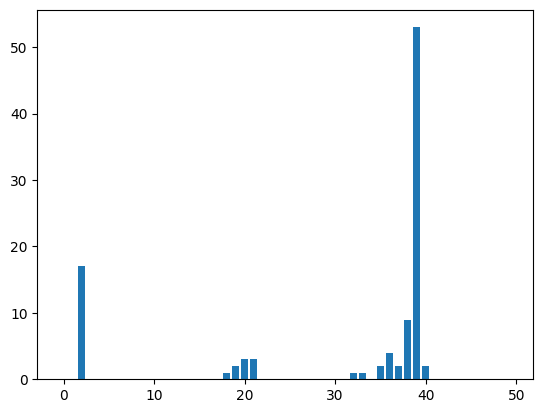

In [59]:
qual = quals[2]
qual_hist(qual)

In [61]:
gc = find_gc_by_pos(seqs)

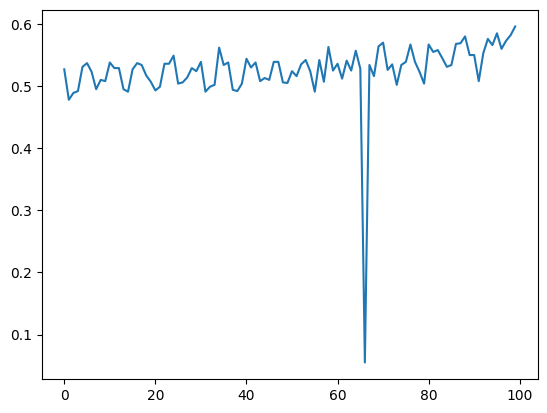

In [62]:
plt.plot(range(len(gc)), gc)
plt.show()


In [63]:
for i, x in enumerate(gc):
    if x < 0.4:
        print(f'{i}: {x}')

66: 0.055
